In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
config = {
    "base_dir":        "/eos/home-b/bpinolin/ML_output/",
    "plot_config":     "VBSOS",
    "cut":             "sr",
    "samples_version": "v0",
    "cols": [
             'detajj',
             'ptll',
             'detall',        
             'jetpt1', 
             'jetpt2', 
             'met',
             'dphill',
             'dphijj',
             'Mll',
             'btag_central',
             'btag_forward',
             'dR_jl1',
             'dR_jl2',
             'Zeppll',
             'mjj',
             'Zepp1',
             'Zepp2',
             'eta1',
             'eta2',
             'Jet_nConst_central',
             'Jet_nConst_forward',
             'qgl_forward',
             'qgl_central',
             'area_forward',
             'area_central'
            ],
}

In [3]:
import os

config_base_dir = os.path.join(config["base_dir"], config["plot_config"])
# load numpy
samples_dir = os.path.join(config_base_dir, config["cut"] , "samples", config["samples_version"])
file_sig_bal = os.path.join(samples_dir, "for_training/signal_balanced.pkl")
file_bkg_bal = os.path.join(samples_dir, "for_training/background_balanced.pkl")

In [4]:
import pickle
signal = pickle.load(open(file_sig_bal, "rb"))
bkg = pickle.load(open(file_bkg_bal, "rb"))

In [5]:
len(bkg)

48365

## Plotting weights

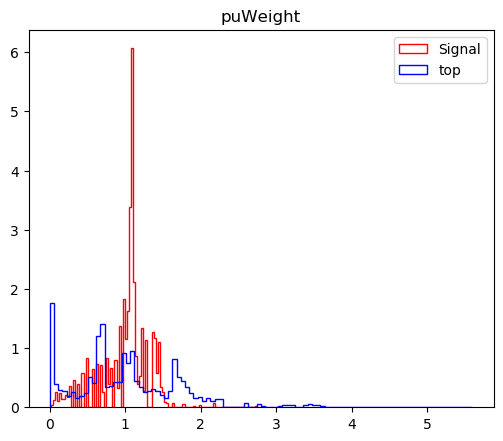

In [6]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(signal["puWeight"], bins=100, histtype="step", density=True, label="Signal", color='red')
_ = plt.hist(bkg["puWeight"], bins=100, histtype="step", density=True, label="top", color='blue')
plt.legend()
plt.title("puWeight")
plt.show()

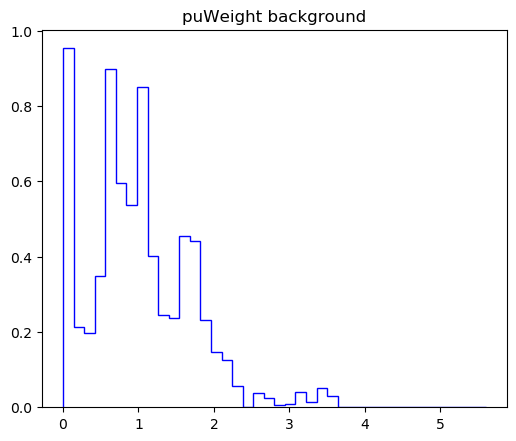

In [7]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(bkg["puWeight"], bins=40, histtype="step", density=True, label="top", color='blue')
#plt.legend()
plt.title("puWeight background")
plt.show()

In [40]:
a = bkg["puWeight"]
b = bkg["Pileup_nTrueInt"]

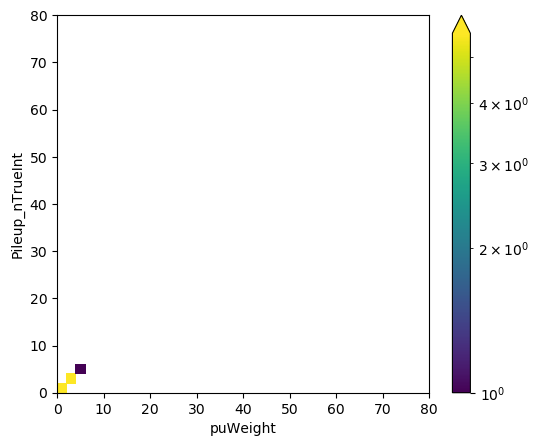

In [45]:
import matplotlib

fig = plt.figure(figsize=(6,5), dpi=100)

plt.hist2d(a,a, bins=40, range=((0,80),(0,80)), norm=matplotlib.colors.LogNorm(vmin=1,vmax=a.max()))

plt.colorbar(extend='max')
plt.xlabel("puWeight")
plt.ylabel("Pileup_nTrueInt")
plt.show()

<Figure size 600x500 with 0 Axes>

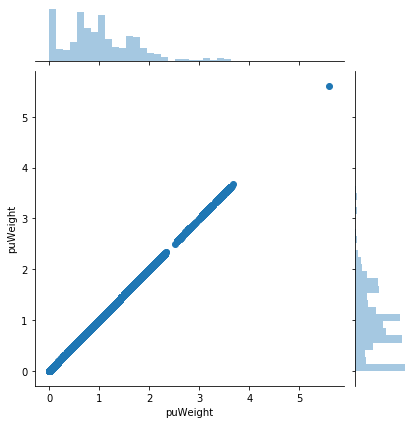

In [36]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; #sns.set(color_codes=True)
#sns.set_context("notebook")
#sns.set_style("darkgrid")

fig = plt.figure(figsize=(6,5), dpi=100)

sns.jointplot(x=a, y=a, marginal_kws=dict(bins=40))

## Check weights Wnn

In [6]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
X_sig = signal[config["cols"]].values
X_bkg = bkg[config["cols"]].values
Y_sig = np.ones(len(X_sig))
Y_bkg = np.zeros(len(X_bkg))
W_sig = (signal["weight_norm"]).values
W_bkg = (bkg["weight_norm"]).values
Wnn_sig = (signal["weight_"]).values
Wnn_bkg = (bkg["weight_"]).values

X = np.vstack([X_sig, X_bkg])
Y = np.hstack([Y_sig, Y_bkg])
W = np.hstack([W_sig, W_bkg])
Wnn = np.hstack([Wnn_sig, Wnn_bkg])

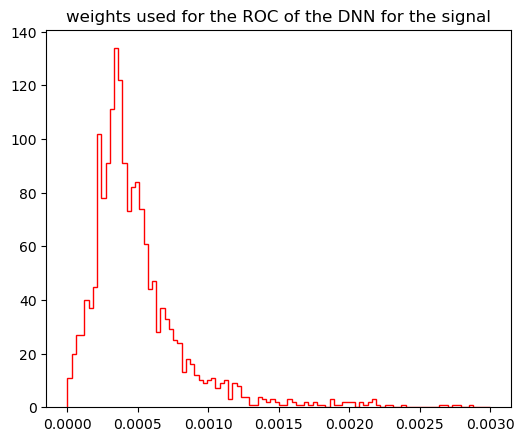

In [37]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(Wnn_sig, bins=100, histtype="step", color='red', range=(0,0.003))
plt.title("weights used for the ROC of the DNN for the signal")
plt.show()

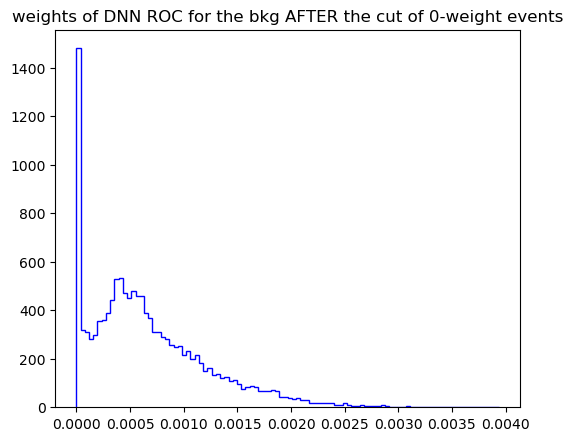

In [38]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(Wnn_bkg, bins=100, histtype="step", color='blue')
plt.title("weights of DNN ROC for the bkg AFTER the cut of 0-weight events")
#plt.yscale("log")
plt.show()

In [24]:
len(bkg)

11698

## Plotting all variables

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
top = scaler.transform(bkg[bkg.sample_name=="top"][config["cols"]].values)

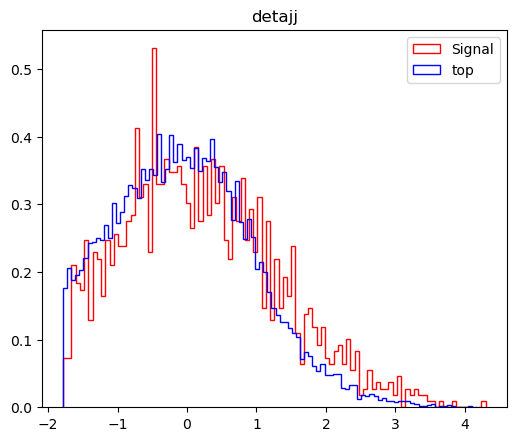

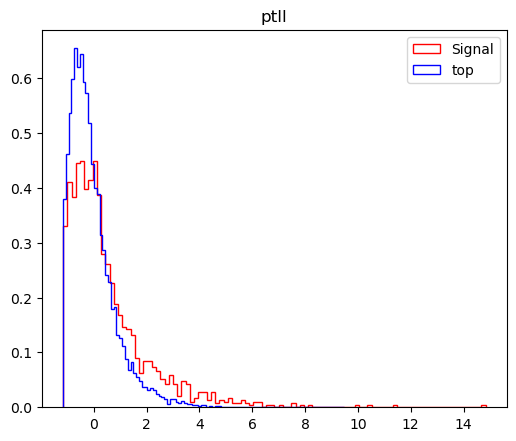

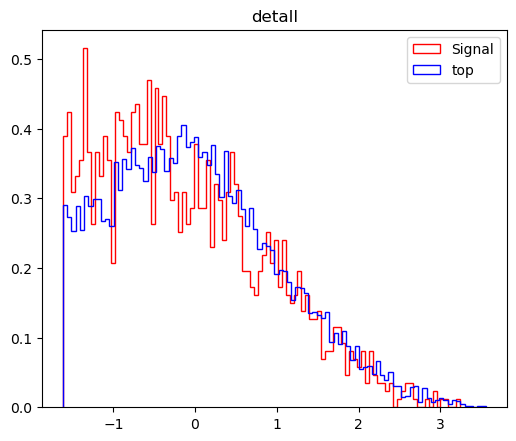

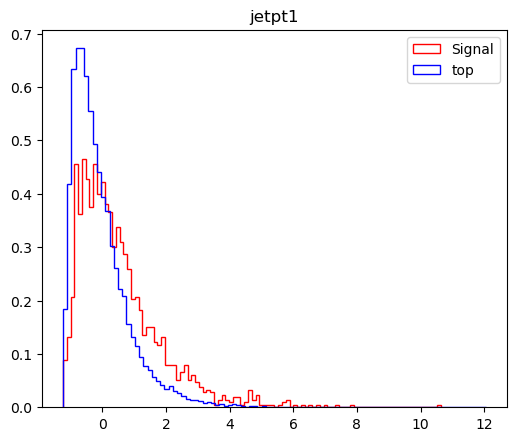

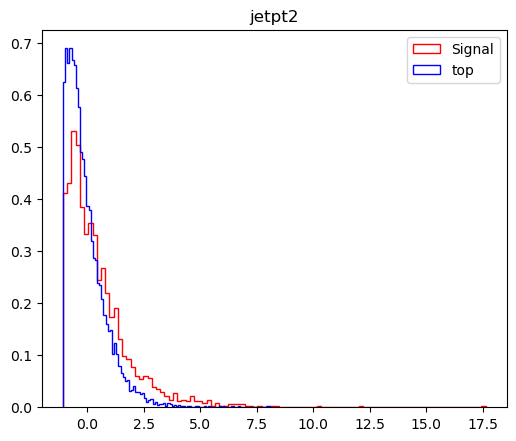

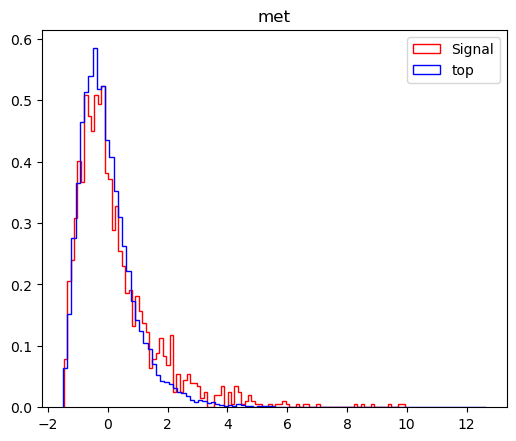

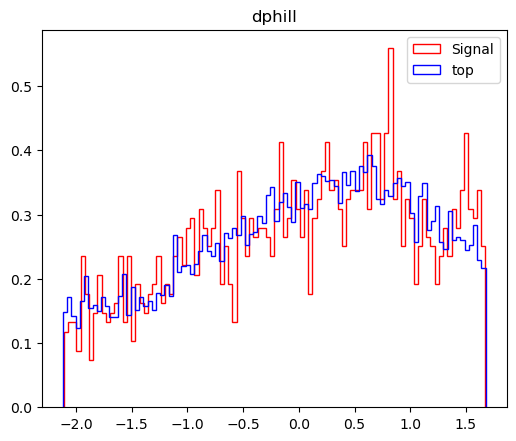

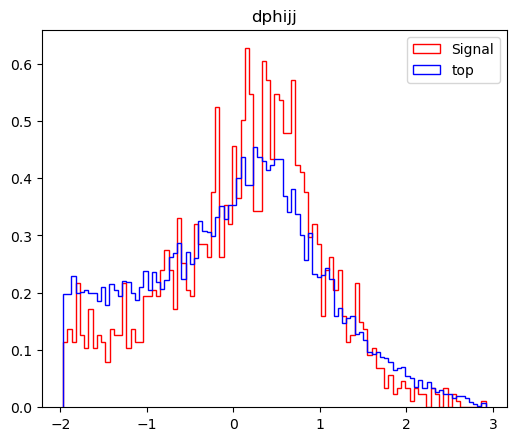

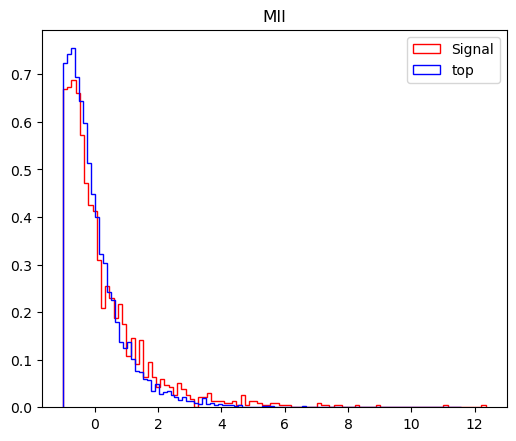

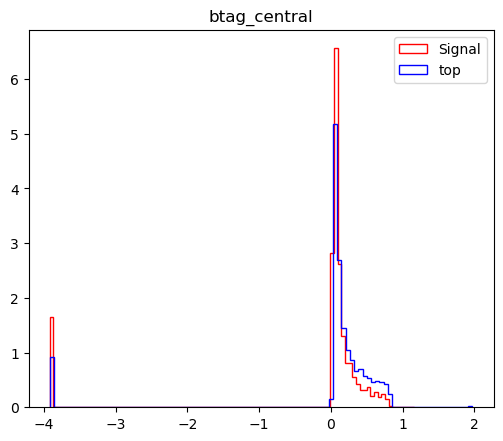

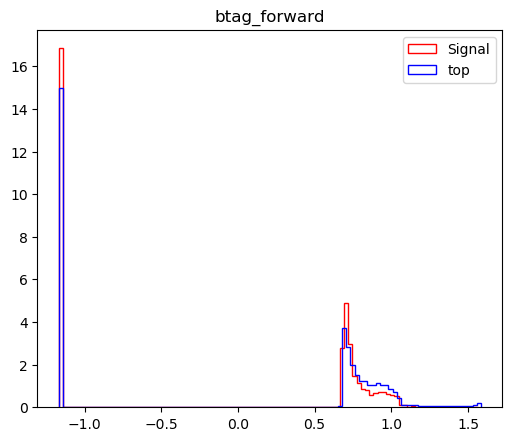

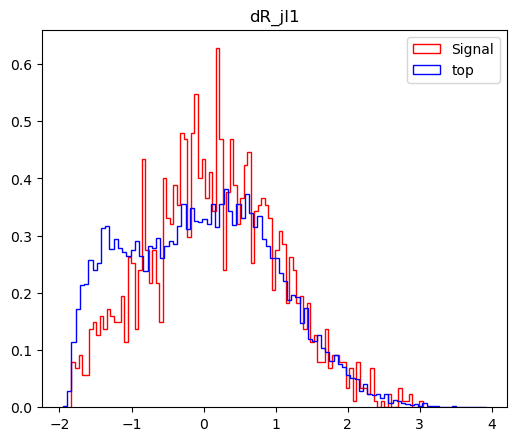

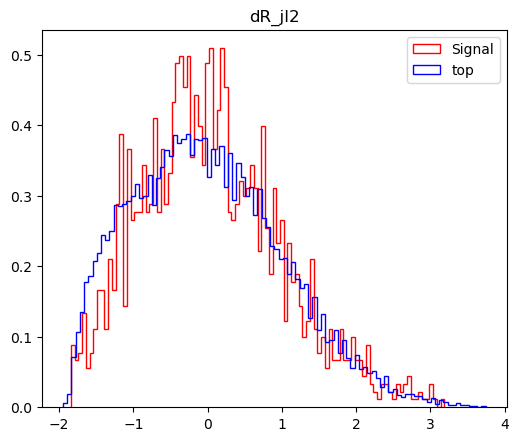

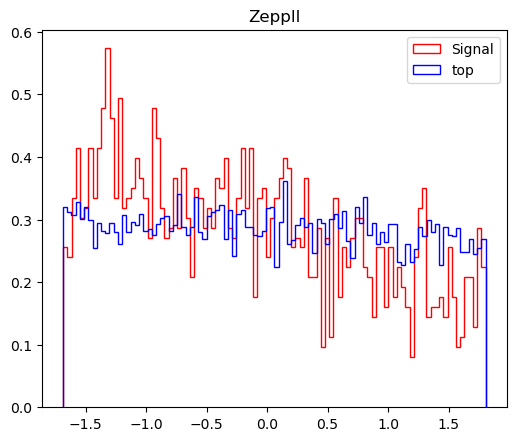

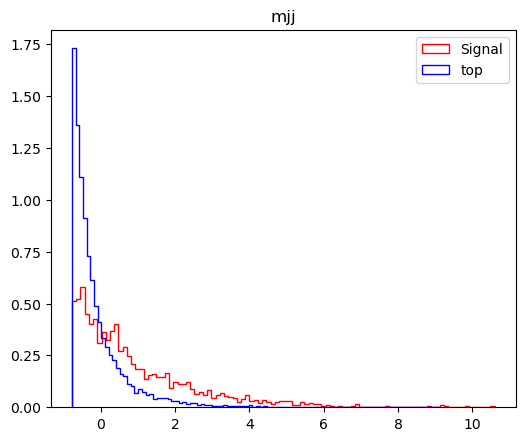

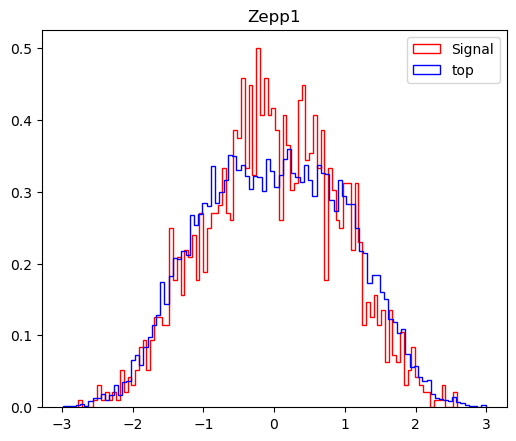

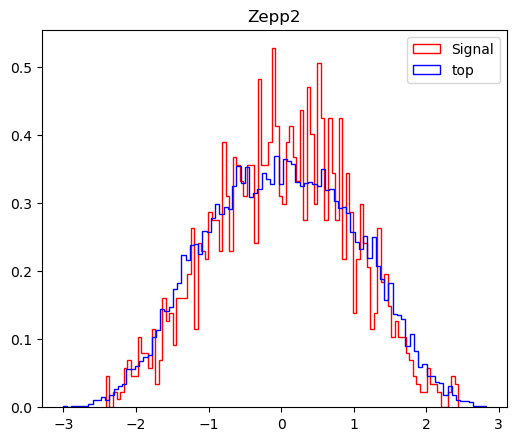

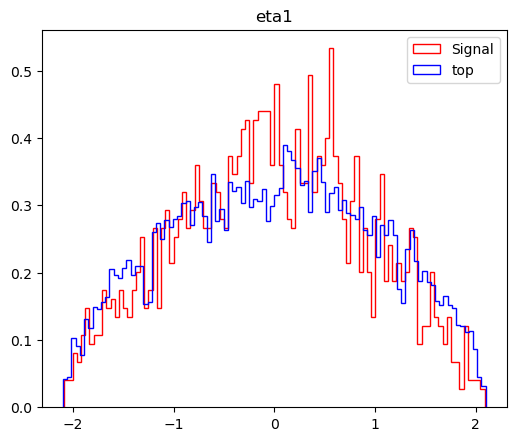

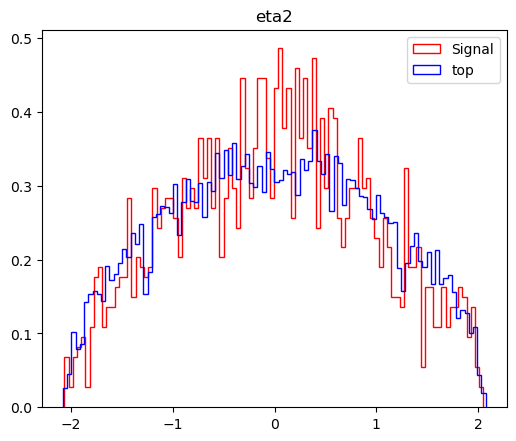

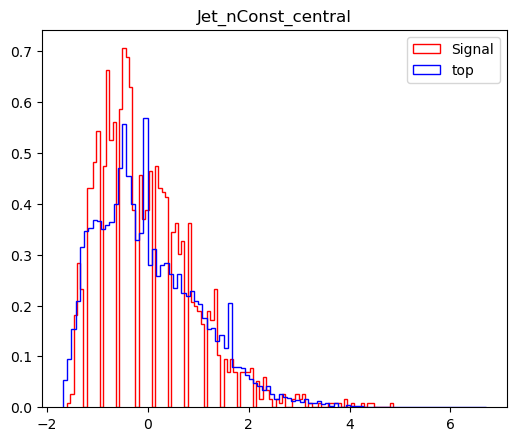

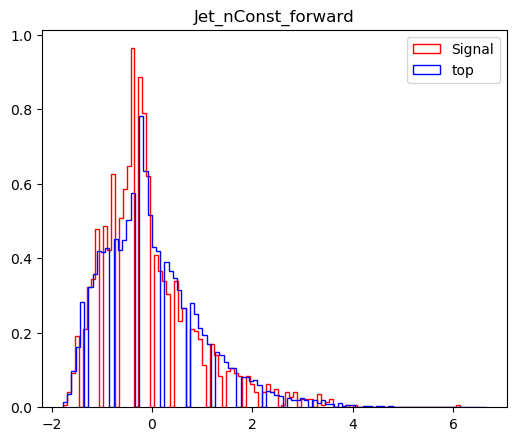

/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


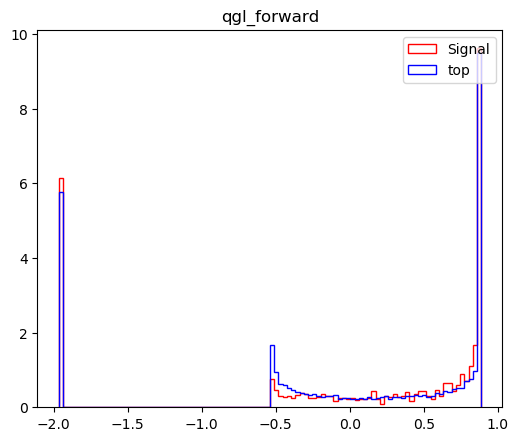

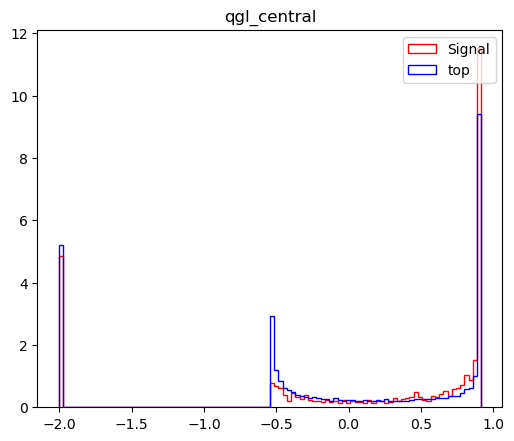

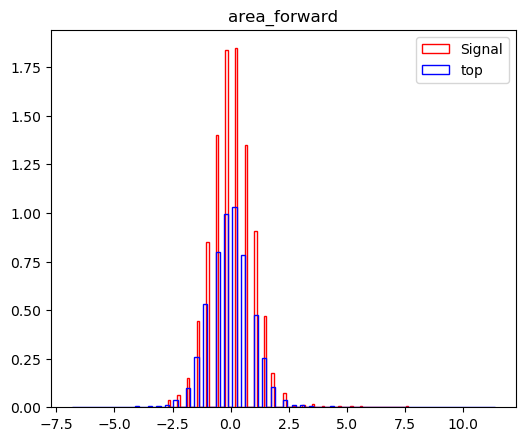

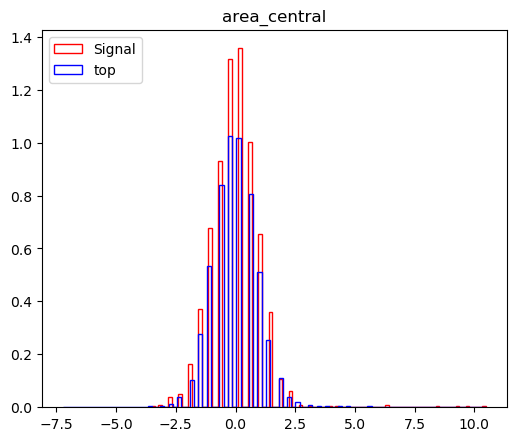

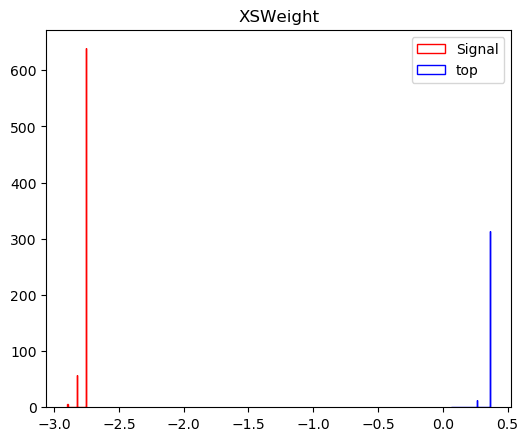

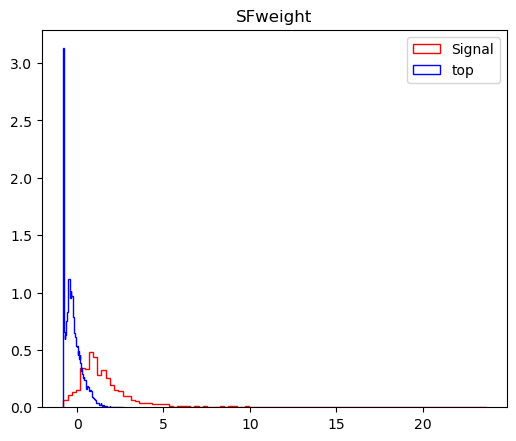

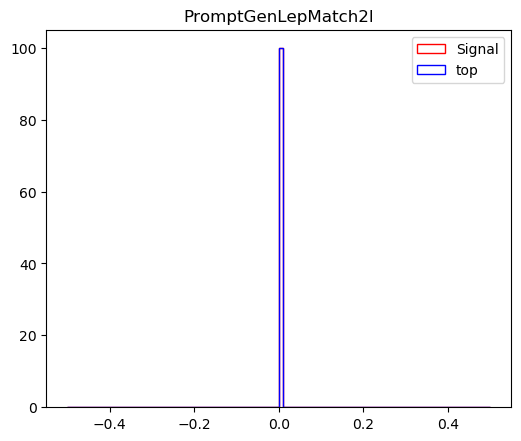

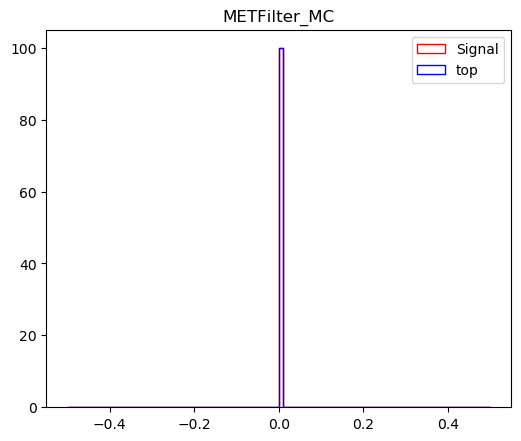

In [16]:
for idx,col in enumerate(config["cols"]):
    fig = plt.figure(figsize=(6,5), dpi=100)
    _ = plt.hist(X_scaled[Y==1,idx], bins=100, histtype="step", density=True, label="Signal", color='red')
    _ = plt.hist(top[:,idx], bins=100, histtype="step", density=True, label="top", color='blue')
    plt.legend()
    plt.title(col)
    plt.show()

## Extracting mjj for ROC

In [10]:
signal = signal[(signal['mjj'] >= 500) & (signal["detajj"] >= 3.5)]
bkg = bkg[(bkg['mjj'] >= 500) & (bkg["detajj"] >= 3.5)]

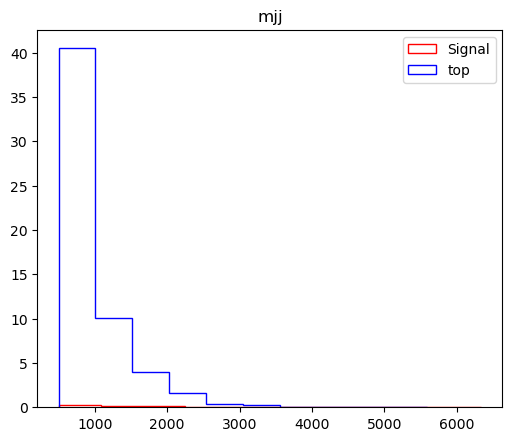

In [12]:
fig = plt.figure(figsize=(6,5), dpi=100)
n_sig, b, _ = plt.hist(signal["mjj"], bins=10, histtype="step", weights=signal["weight_"], label="Signal", color='red')
n_bkg, b, _ = plt.hist(bkg["mjj"], bins=10, histtype="step", weights=bkg["weight_"], label="top", color='blue')
plt.legend()
plt.title("mjj")
plt.show()

In [13]:
print(n_sig.tolist())

[0.252818294561848, 0.1631220647455597, 0.09189376812361112, 0.045031089422451855, 0.024237867976833492, 0.012485875329946543, 0.001474167981527821, 0.00020583230212227168, 0.0013759006956346352, 0.0009461729005950114]


In [14]:
print(n_bkg.tolist())

[40.55634245621577, 10.043555350191705, 3.9501097616903516, 1.6236074236513225, 0.37910958379070236, 0.23435484224346545, 0.06000269824700746, 0.010386525954430417, 0.0010293262583219356, 0.0009156500295100843]
